[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read the data

In [2]:
df = pd.read_csv('athlete_events.csv')

### Don't forget to drop duplicates first

In [3]:
df.drop_duplicates(inplace=True)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [4]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

Text(0.5, 1.0, ' missing data')

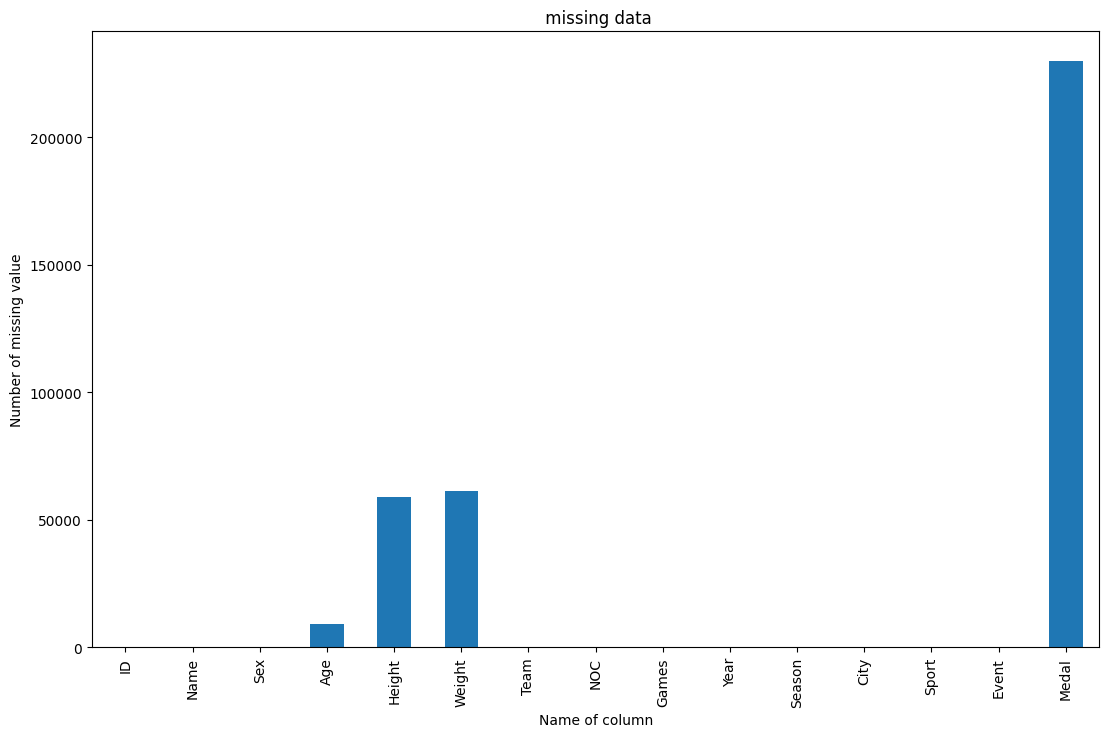

In [5]:
df.isna().sum().plot.bar(figsize=(13,8))
plt.ylabel('Number of missing value')
plt.xlabel('Name of column')
plt.title(' missing data')

### plot the Number of males and females

In [6]:
df['Sex'].value_counts()

M    195353
F     74378
Name: Sex, dtype: int64

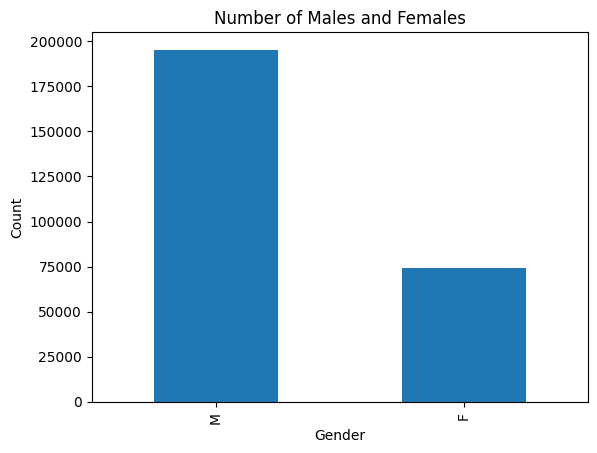

In [7]:
# Count the occurrences of each gender
gender_counts = df['Sex'].value_counts()
gender_counts.plot(kind='bar')
plt.title('Number of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### How many cities do we have and what are they ?

In [8]:
num_cities = df['City'].nunique()
city_counts = df['City'].unique()
print('Number of cities:' , num_cities)
print("Name of cities:" , city_counts)

Number of cities: 42
Name of cities: ['Barcelona' 'London' 'Antwerpen' 'Paris' 'Calgary' 'Albertville'
 'Lillehammer' 'Los Angeles' 'Salt Lake City' 'Helsinki' 'Lake Placid'
 'Sydney' 'Atlanta' 'Stockholm' 'Sochi' 'Nagano' 'Torino' 'Beijing'
 'Rio de Janeiro' 'Athina' 'Squaw Valley' 'Innsbruck' 'Sarajevo'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Oslo' "Cortina d'Ampezzo"
 'Melbourne' 'Roma' 'Amsterdam' 'Montreal' 'Moskva' 'Tokyo' 'Vancouver'
 'Grenoble' 'Sapporo' 'Chamonix' 'St. Louis' 'Sankt Moritz'
 'Garmisch-Partenkirchen']


# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year and plot them





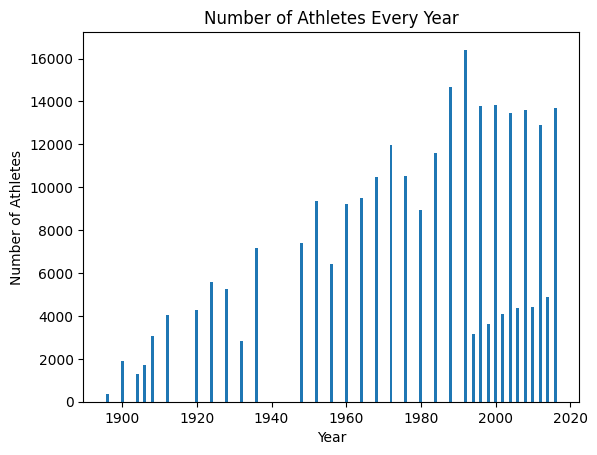

In [9]:
athlete_counts = df['Year'].value_counts().sort_index()
plt.bar(athlete_counts.index, athlete_counts.values)
plt.title('Number of Athletes Every Year')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.show()



### Which athlete participated the most? (his/her name and ID)

In [10]:
# The above gives you the medals, the question is for "who participated the most?"
# Group by 'Name' and 'ID' and count the number of appearances for each athlete
player_participations = df.groupby(['Name', 'ID']).size().reset_index(name='Participations')
top_participants = player_participations.sort_values('Participations', ascending=False).head(5)

# Print the details of the top 5 participants
for index, player in top_participants.iterrows():
    print(f"Name of Participant: {player['Name']}")
    print(f"ID: {player['ID']}")
    print(f"Number of Participations: {player['Participations']}\n")

Name of Participant: Heikki Ilmari Savolainen
ID: 106296
Number of Participations: 39

Name of Participant: Joseph "Josy" Stoffel
ID: 115354
Number of Participations: 38

Name of Participant: Ioannis Theofilakis
ID: 119591
Number of Participations: 36

Name of Participant: Takashi Ono
ID: 89187
Number of Participations: 32

Name of Participant: Andreas Wecker
ID: 129196
Number of Participations: 32



# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this
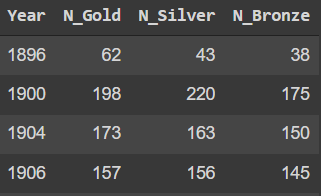

In [11]:
medal_counts = df.groupby(['Year', 'Medal'])['Medal'].count().unstack().fillna(0)
medal_counts = medal_counts[['Gold', 'Silver', 'Bronze']]  # Reorder columns to match Gold, Silver, Bronze order
medal_counts.columns = ['N_Gold', 'N_Silver', 'N_Bronze']  # Rename columns
print(medal_counts)



      N_Gold  N_Silver  N_Bronze
Year                            
1896      62        43        38
1900     198       220       175
1904     173       163       150
1906     157       156       145
1908     294       281       256
1912     326       315       300
1920     493       448       367
1924     332       319       311
1928     275       267       281
1932     261       246       232
1936     348       347       330
1948     330       332       325
1952     351       335       347
1956     353       342       348
1960     359       342       357
1964     408       406       401
1968     425       410       421
1972     474       455       485
1976     508       505       518
1980     529       531       542
1984     571       551       576
1988     607       601       637
1992     663       657       710
1994     110       109       112
1996     608       605       629
1998     145       145       150
2000     663       661       680
2002     162       157       159
2004     6

# plot the previous table

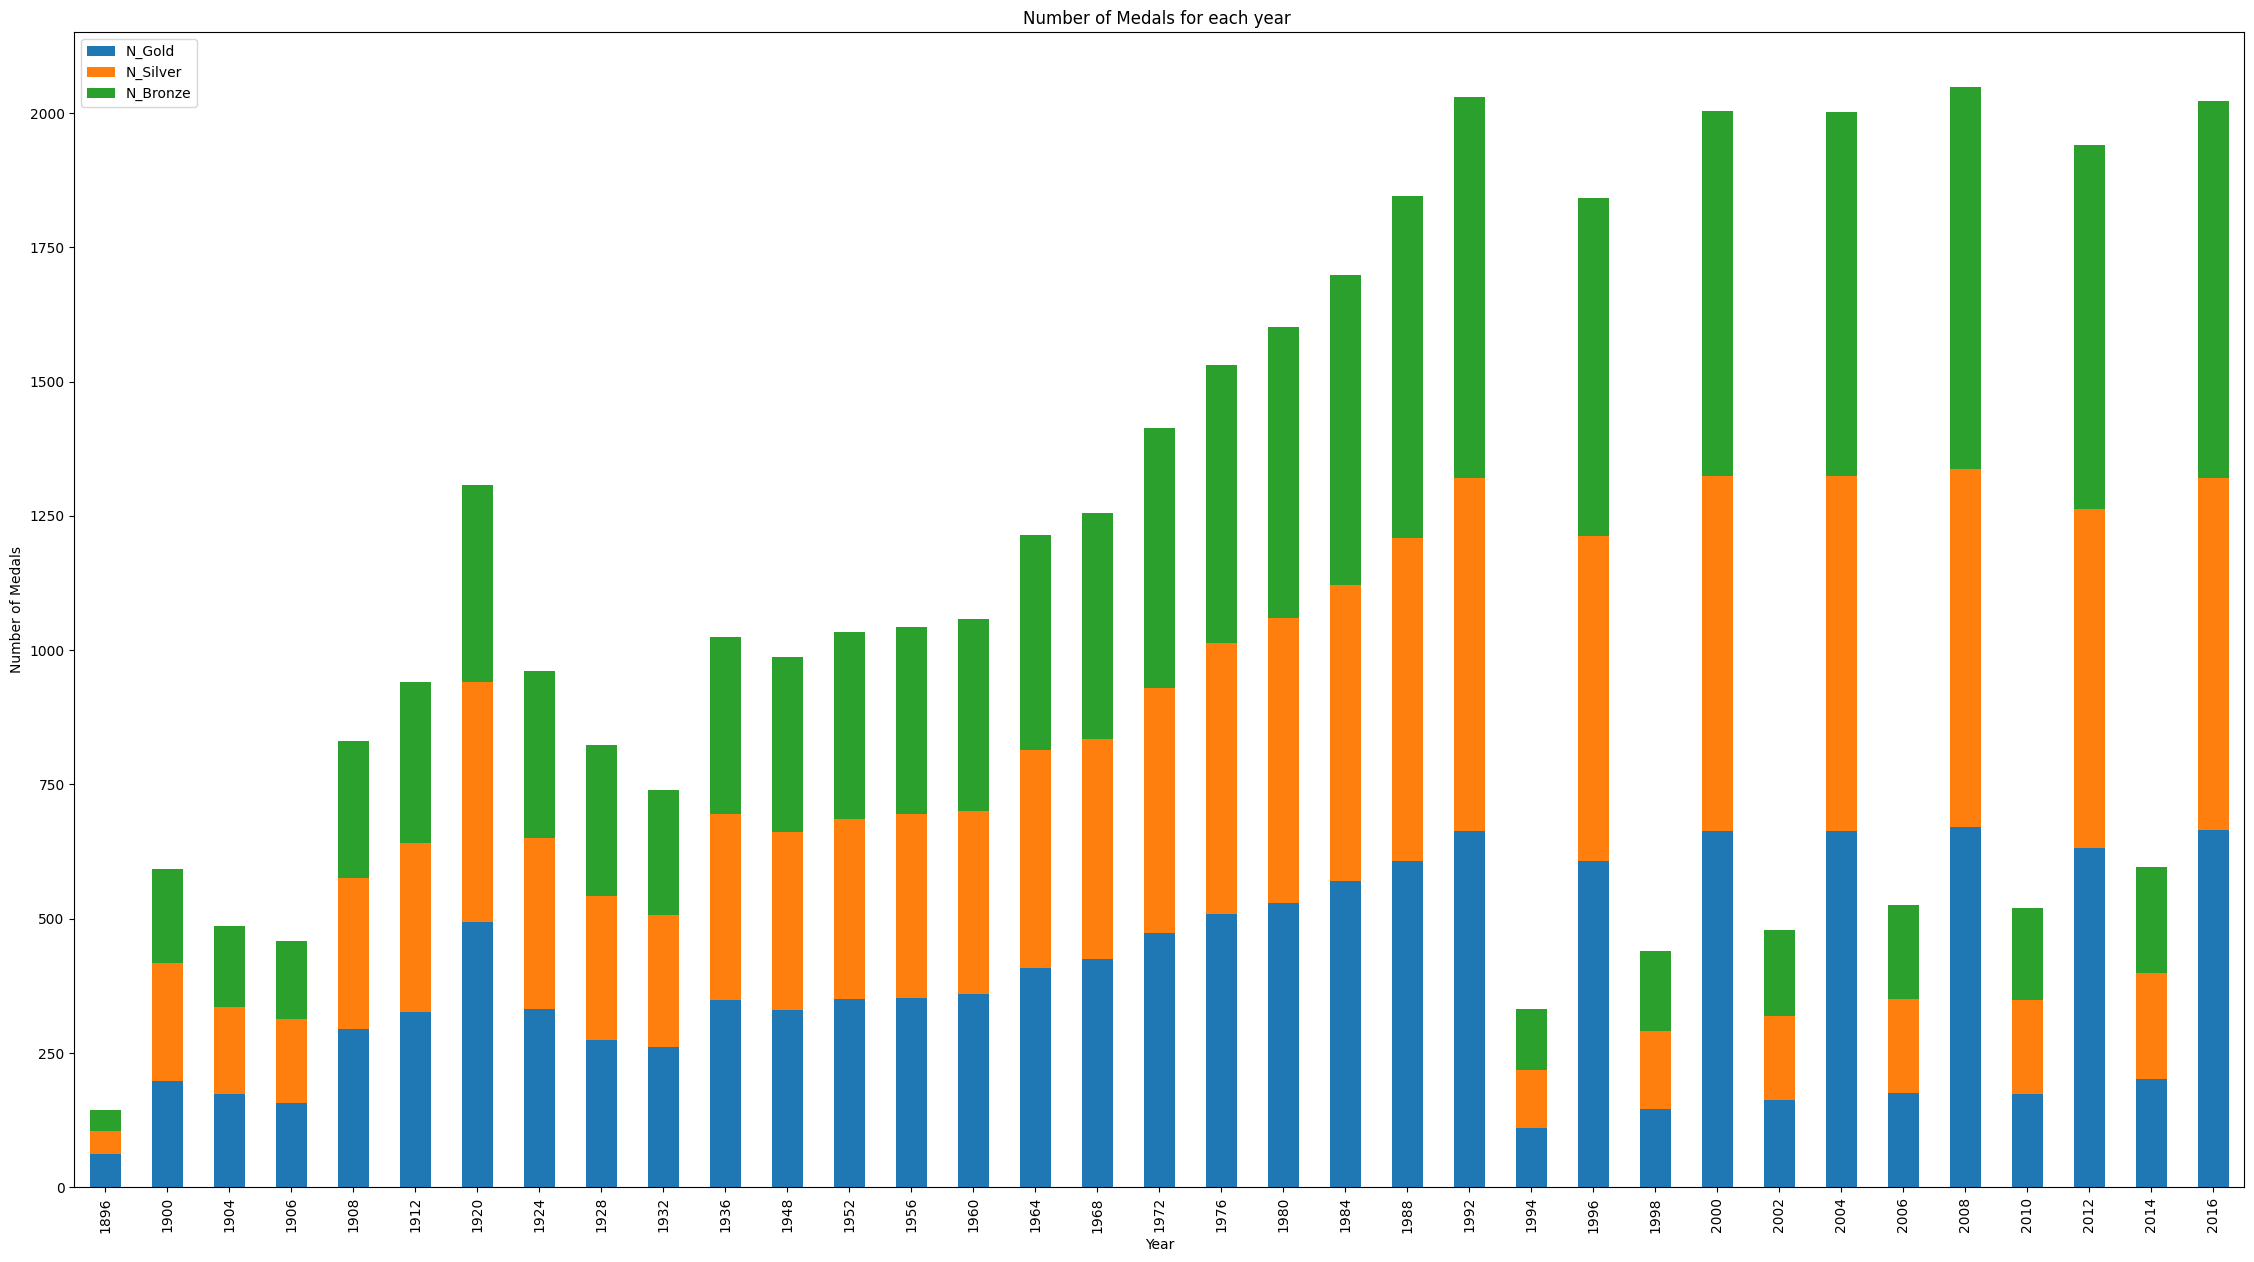

In [13]:
medal_counts.plot(kind='bar',  stacked=True)
plt.rcParams['figure.figsize'] = [30, 15] #to increase the figure size
plt.title('Number of Medals for each year ')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()



# <font color='red'>**You are Geek!**</fond>
### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

Text(0, 0.5, 'City')

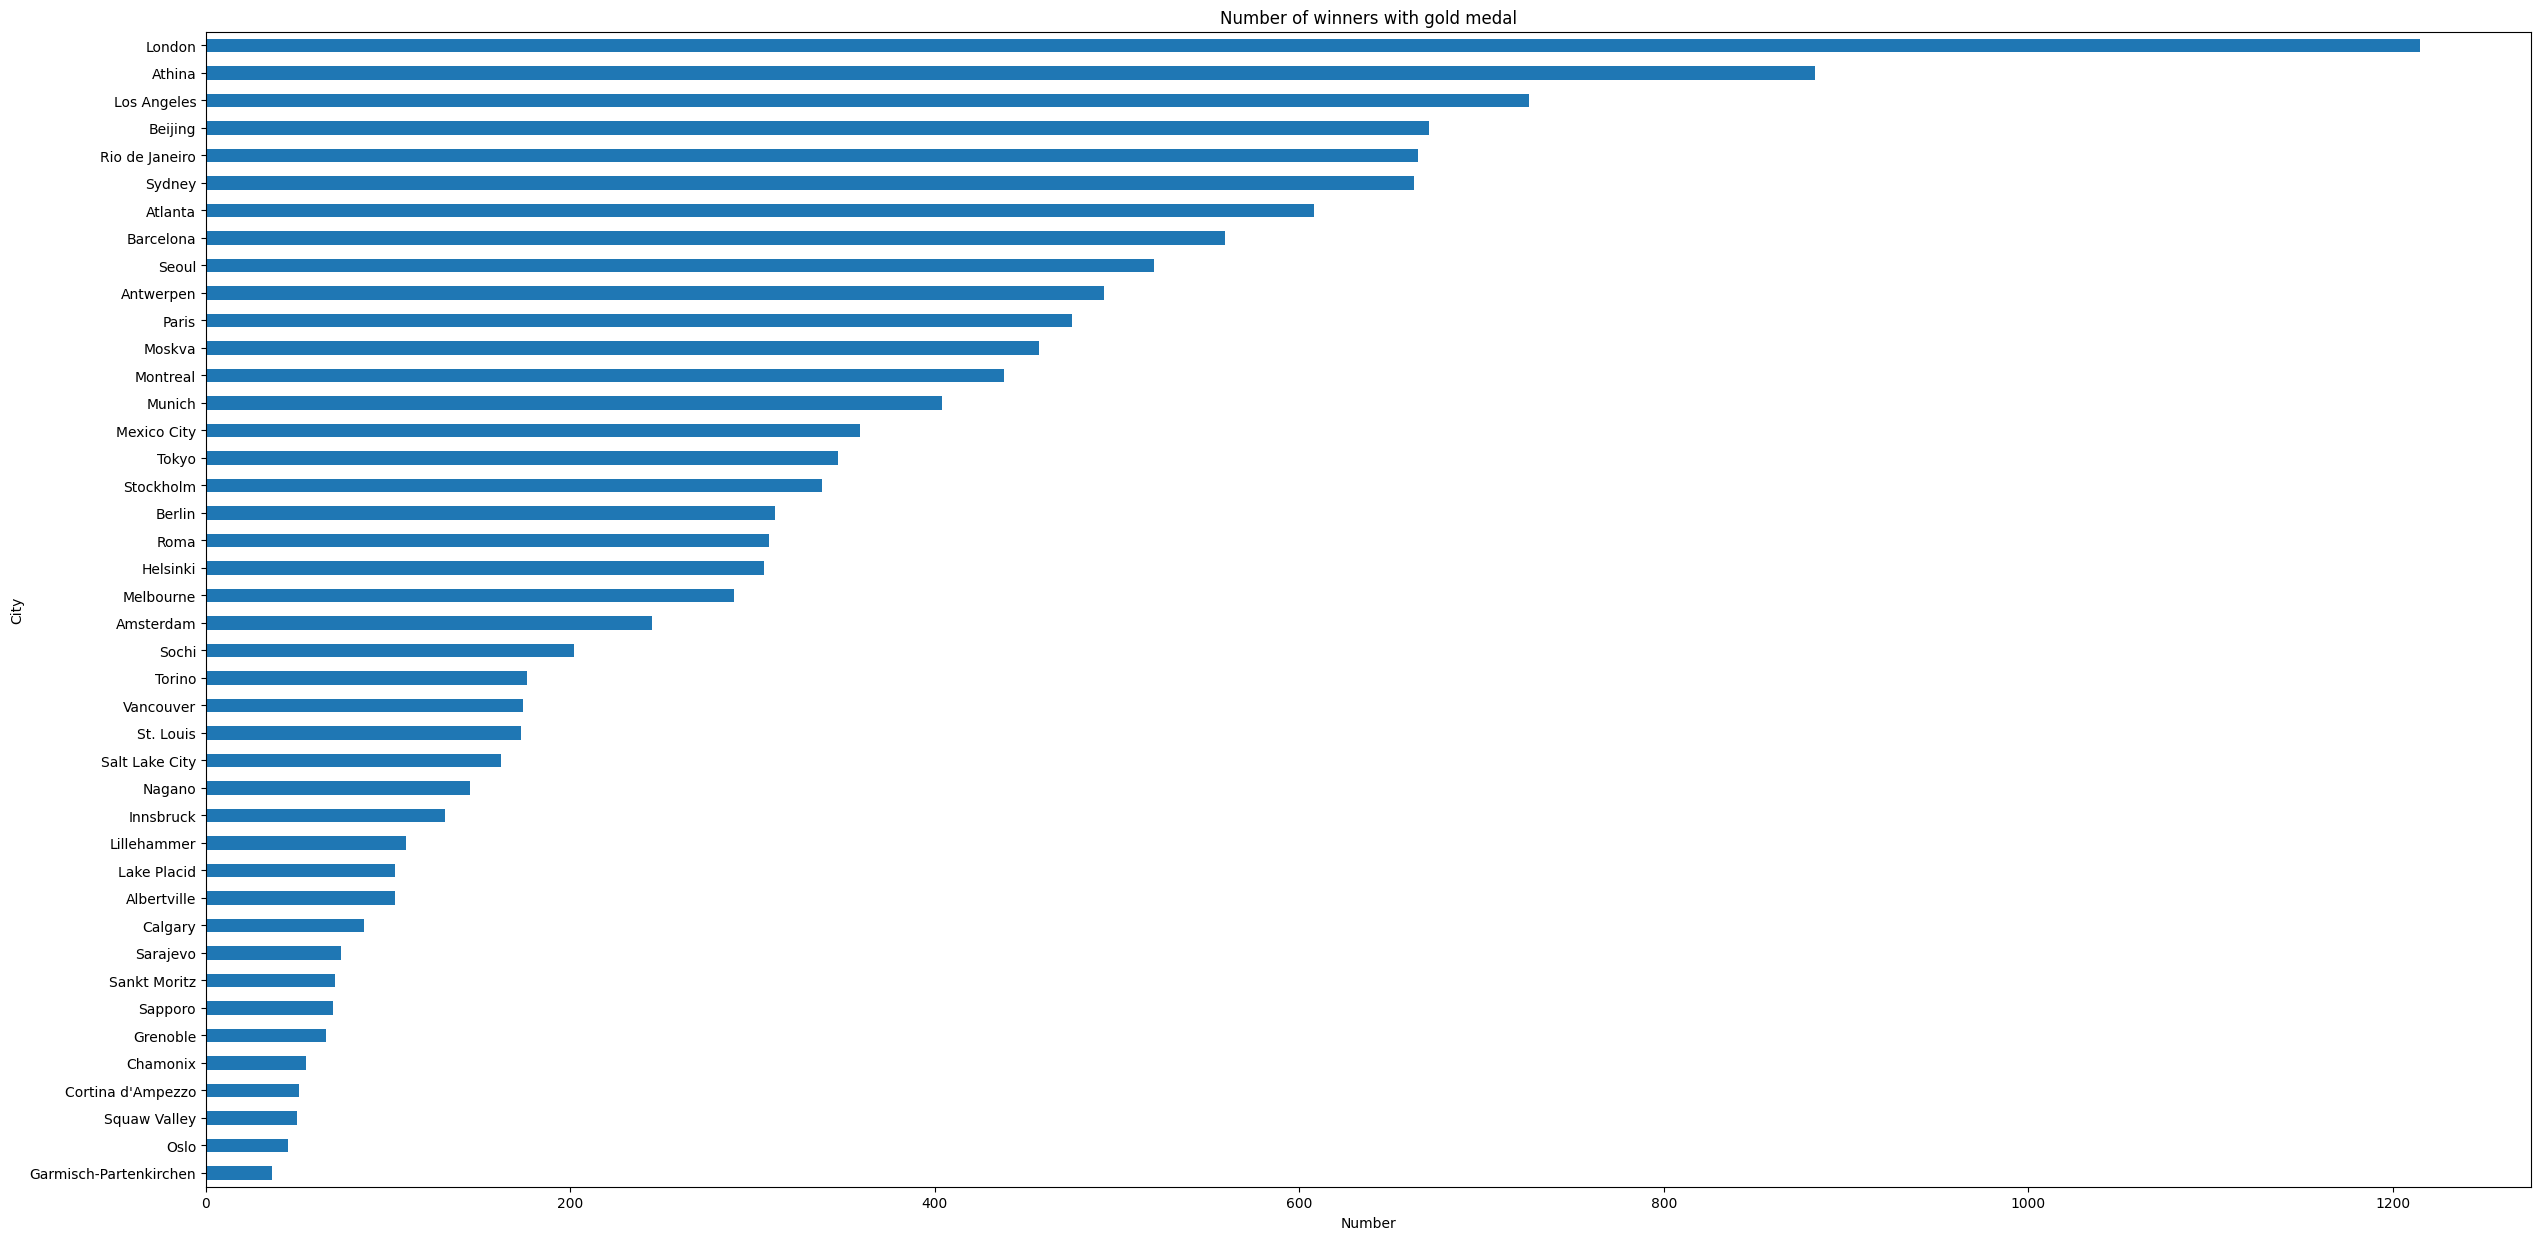

In [14]:
gold_medals = df[df['Medal'] == 'Gold']
gold_medals_city = gold_medals.groupby('City')['Medal'].count().sort_values(ascending=True)
gold_medals_city.plot(kind='barh')
plt.title('Number of winners with gold medal')
plt.xlabel('Number')
plt.ylabel('City')




### Find the total missing data for each year?

> Indented block



Year
1896     1065
1900     5676
1904     3331
1906     5022
1908     8057
1912    10018
1920    11175
1924    15194
1928    14124
1932     6308
1936    18433
1948    20008
1952    22943
1956    13531
1960    10407
1964     9710
1968     9663
1972    11331
1976    10819
1980     8706
1984    11307
1988    14802
1992    20759
1994     3207
1996    15638
1998     3337
2000    12067
2002     3707
2004    11515
2006     3878
2008    11866
2010     3908
2012    11507
2014     4532
2016    12064
dtype: int64


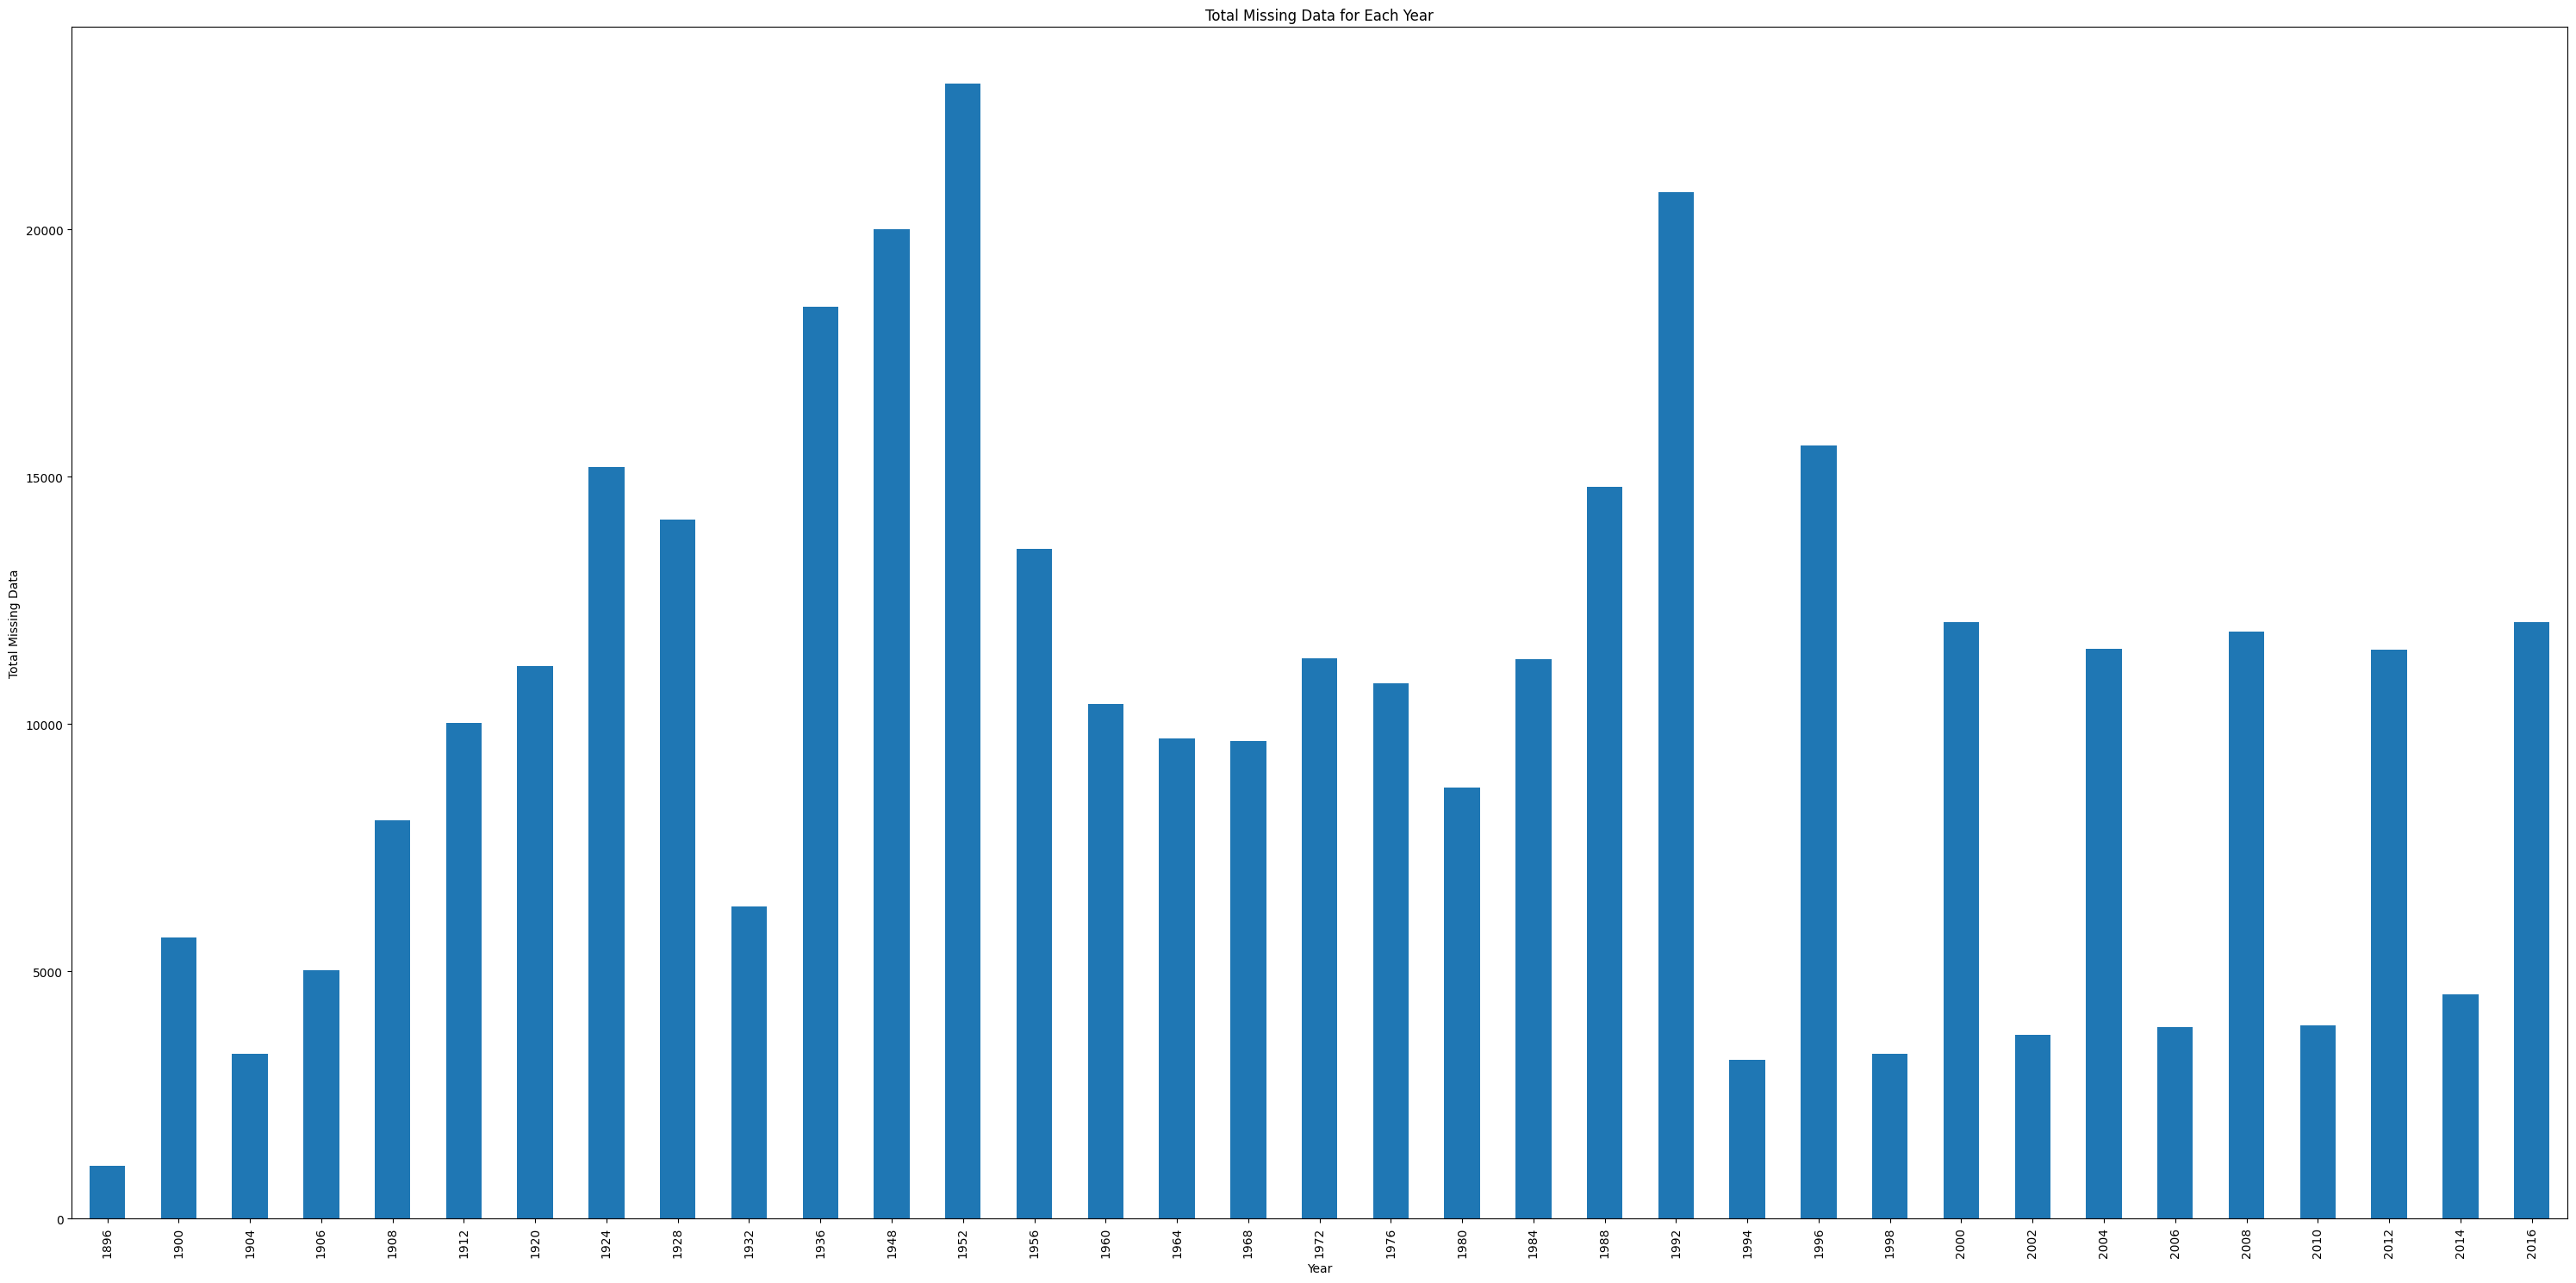

In [15]:
# Calculate the missing values for each column per year
missing_data_by_year = df.groupby('Year').apply(lambda x: x.isnull().sum())

# Sum the missing values across all columns for each year to get the total
total_missing_by_year = missing_data_by_year.sum(axis=1)

print(total_missing_by_year)

# Plot the results
total_missing_by_year.plot(kind='bar')
plt.title('Total Missing Data for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Missing Data')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()




# <font color='red'>**I dare you to solve this :)**</fond>
### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

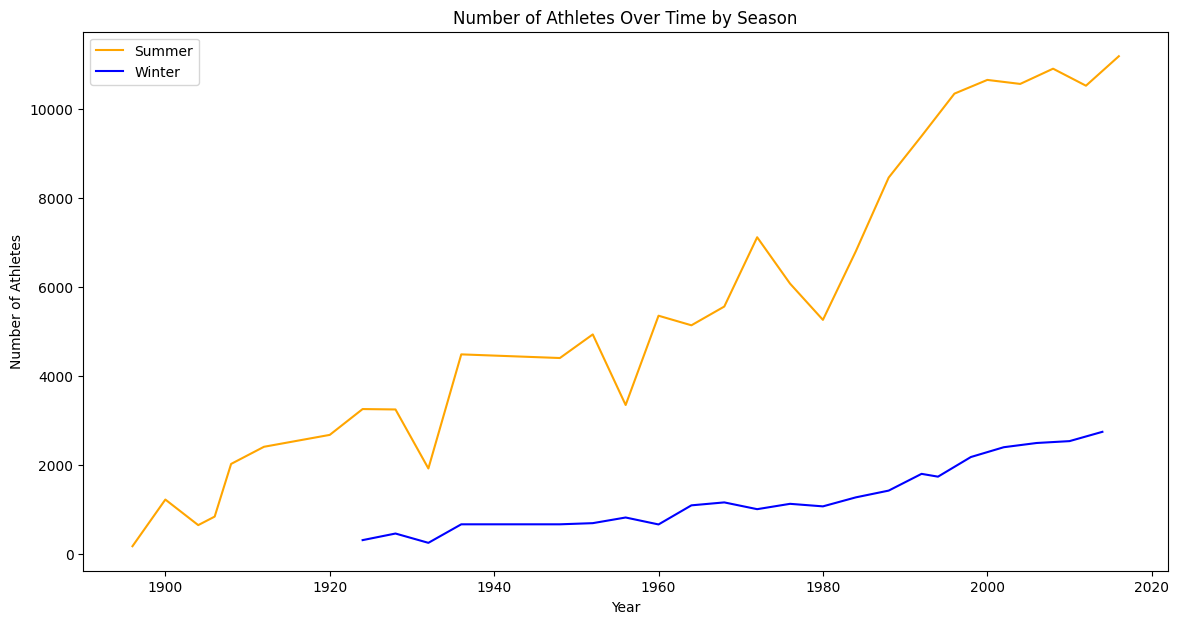

In [ ]:
# Filter the dataframe into two based on the 'Season'
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

# Group by 'Year' and count unique 'ID' for Summer and Winter separately
summer_athletes_by_year = summer_df.groupby('Year')['ID'].nunique()
winter_athletes_by_year = winter_df.groupby('Year')['ID'].nunique()

# Plotting
plt.figure(figsize=(14, 7))

# Plot Summer Data
plt.plot(summer_athletes_by_year.index, summer_athletes_by_year.values, label='Summer', color='orange')

# Plot Winter Data
plt.plot(winter_athletes_by_year.index, winter_athletes_by_year.values, label='Winter', color='blue')
plt.title('Number of Athletes Over Time by Season')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend()
plt.show()


#<font color='red'> **Bouns Questions</fond>**

### How has the participation of male vs. female athletes changed over the years? (You can use a line plot)

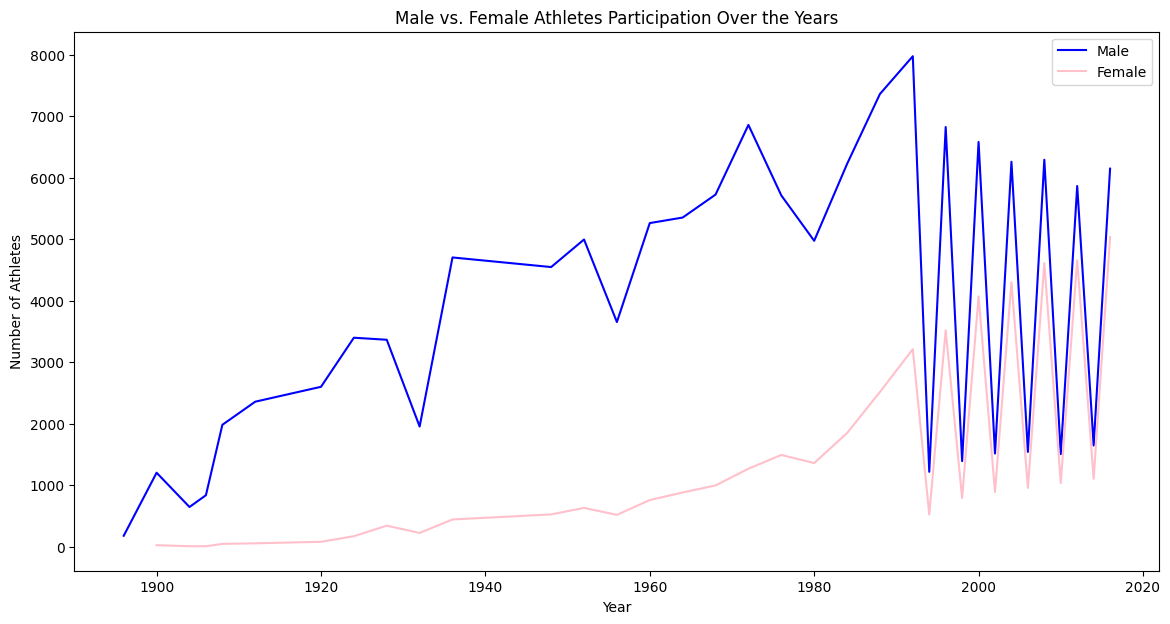

In [16]:
# Group by 'Year' and 'Sex', and count unique 'ID's to find the number of athletes
sex_athletes_by_year = df.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()

# Pivot the results to have years on the index, and male/female columns
sex_athletes_pivot = sex_athletes_by_year.pivot(index='Year', columns='Sex', values='ID')

# Plotting
plt.figure(figsize=(14, 7))

# Plot Male Data
plt.plot(sex_athletes_pivot.index, sex_athletes_pivot['M'], label='Male', color='blue')

# Plot Female Data
plt.plot(sex_athletes_pivot.index, sex_athletes_pivot['F'], label='Female', color='pink')

plt.title('Male vs. Female Athletes Participation Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend()
plt.show()


### What is the distribution of ages of athletes? Are there any differences in age distributions between medal winners and non-medal winners? (You can use histograms or KDE plots.)

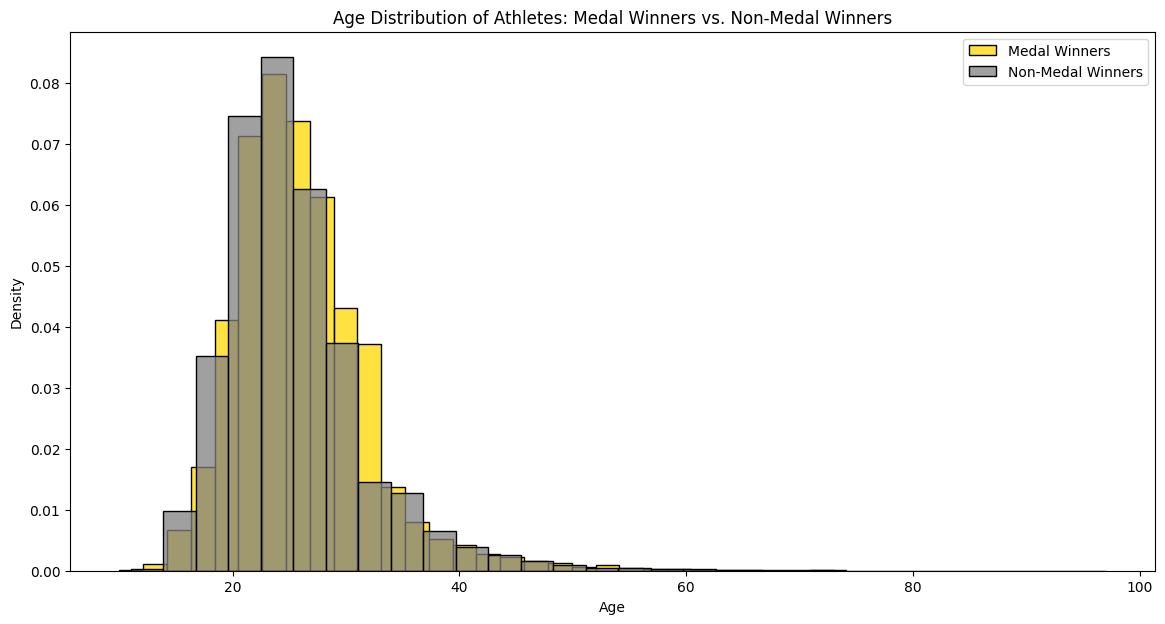

In [17]:
# Create two dataframes: one for medal winners and one for non-medal winners
medal_winners = df.dropna(subset=['Medal'])
non_medal_winners = df[df['Medal'].isnull()]

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Plot histogram for medal winners
sns.histplot(medal_winners['Age'].dropna(), kde=False, label='Medal Winners', bins=30, color='gold', stat='density')

# Plot histogram for non-medal winners
sns.histplot(non_medal_winners['Age'].dropna(), kde=False, label='Non-Medal Winners', bins=30, color='grey', stat='density')

# Add legend and labels
plt.legend()
plt.title('Age Distribution of Athletes: Medal Winners vs. Non-Medal Winners')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


### Which countries have won the most medals in the last 30 years?

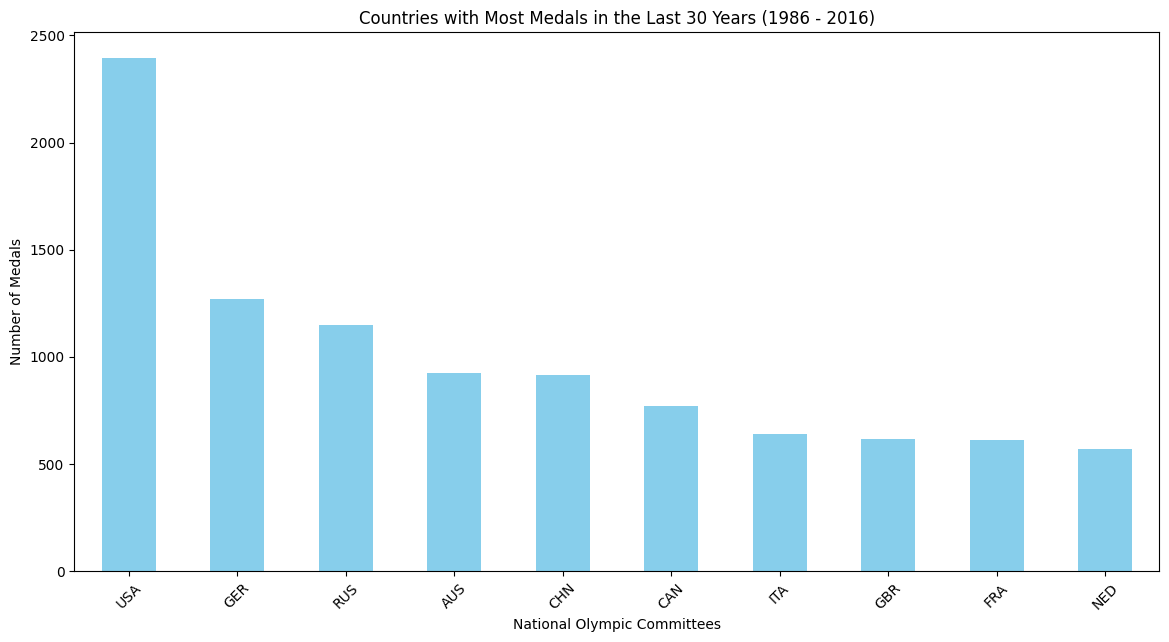

In [18]:
# First, let's find the last year in the dataset to understand the 30-year range
latest_year = df['Year'].max()
year_limit = latest_year - 30

# Filter the dataset for the last 30 years
recent_df = df[(df['Year'] > year_limit) & (df['Medal'].notnull())]

# Count the medals by country
medal_counts = recent_df['NOC'].value_counts().head(10)  # Getting the top 10

# Plotting
plt.figure(figsize=(14, 7))
medal_counts.plot(kind='bar', color='skyblue')

plt.title(f'Countries with Most Medals in the Last 30 Years ({year_limit} - {latest_year})')
plt.xlabel('National Olympic Committees')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()


### Which sports have the highest number of participants in the Summer Olympics vs. the Winter Olympics?

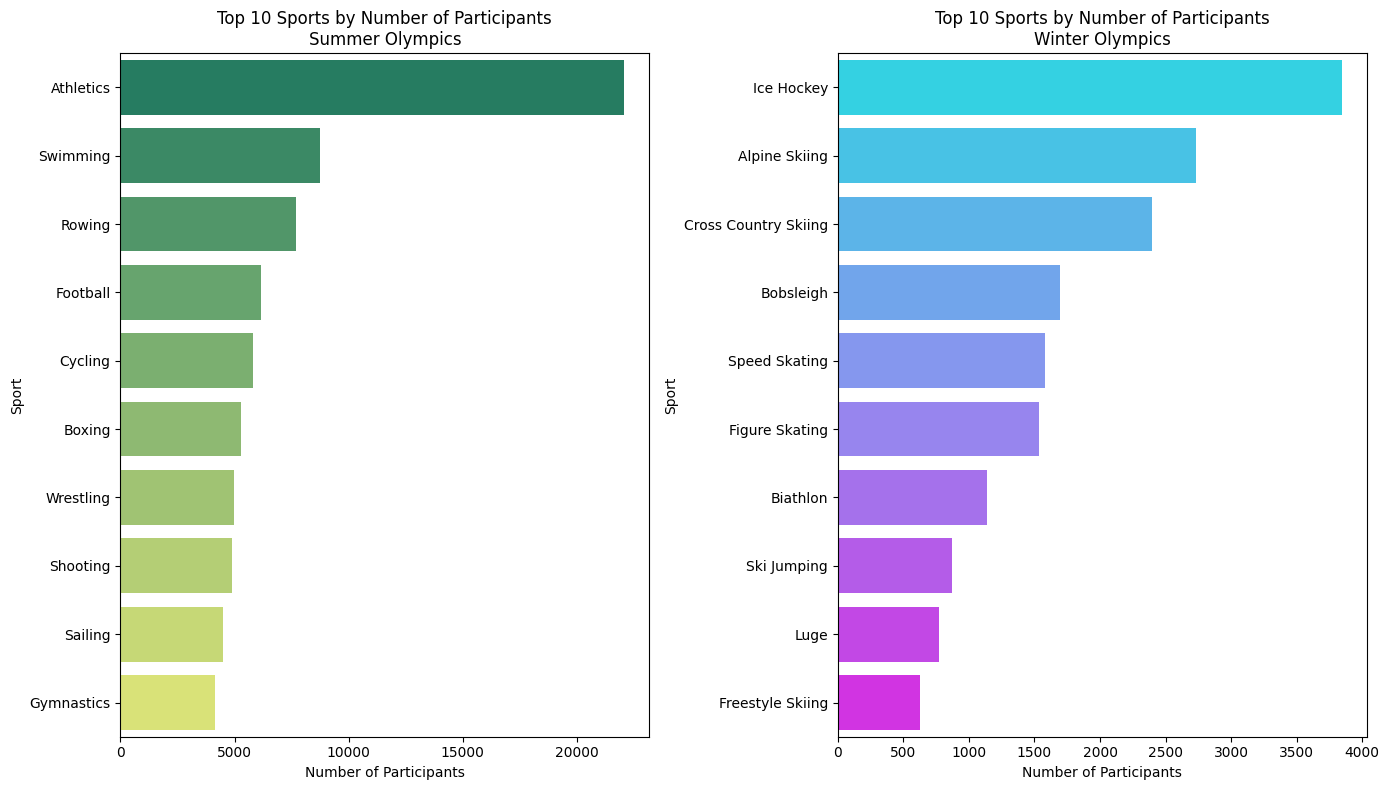

In [ ]:
# Filter data for Summer and Winter Olympics
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

# Group by 'Sport' and count unique 'ID' for Summer Olympics
summer_sports = summer_df.groupby('Sport')['ID'].nunique().sort_values(ascending=False).head(10)

# Group by 'Sport' and count unique 'ID' for Winter Olympics
winter_sports = winter_df.groupby('Sport')['ID'].nunique().sort_values(ascending=False).head(10)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot for Summer Olympics
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.barplot(x=summer_sports.values, y=summer_sports.index, palette="summer")
plt.title('Top 10 Sports by Number of Participants\nSummer Olympics')
plt.xlabel('Number of Participants')
plt.ylabel('Sport')

# Plot for Winter Olympics
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.barplot(x=winter_sports.values, y=winter_sports.index, palette="cool")
plt.title('Top 10 Sports by Number of Participants\nWinter Olympics')
plt.xlabel('Number of Participants')
plt.ylabel('Sport')

plt.tight_layout()
plt.show()



### Is there a relationship between an athlete's height and weight across different sports? (You can use a scatter plot with height on the x-axis and weight on the y-axis, possibly color-coded by sport or medal status.)

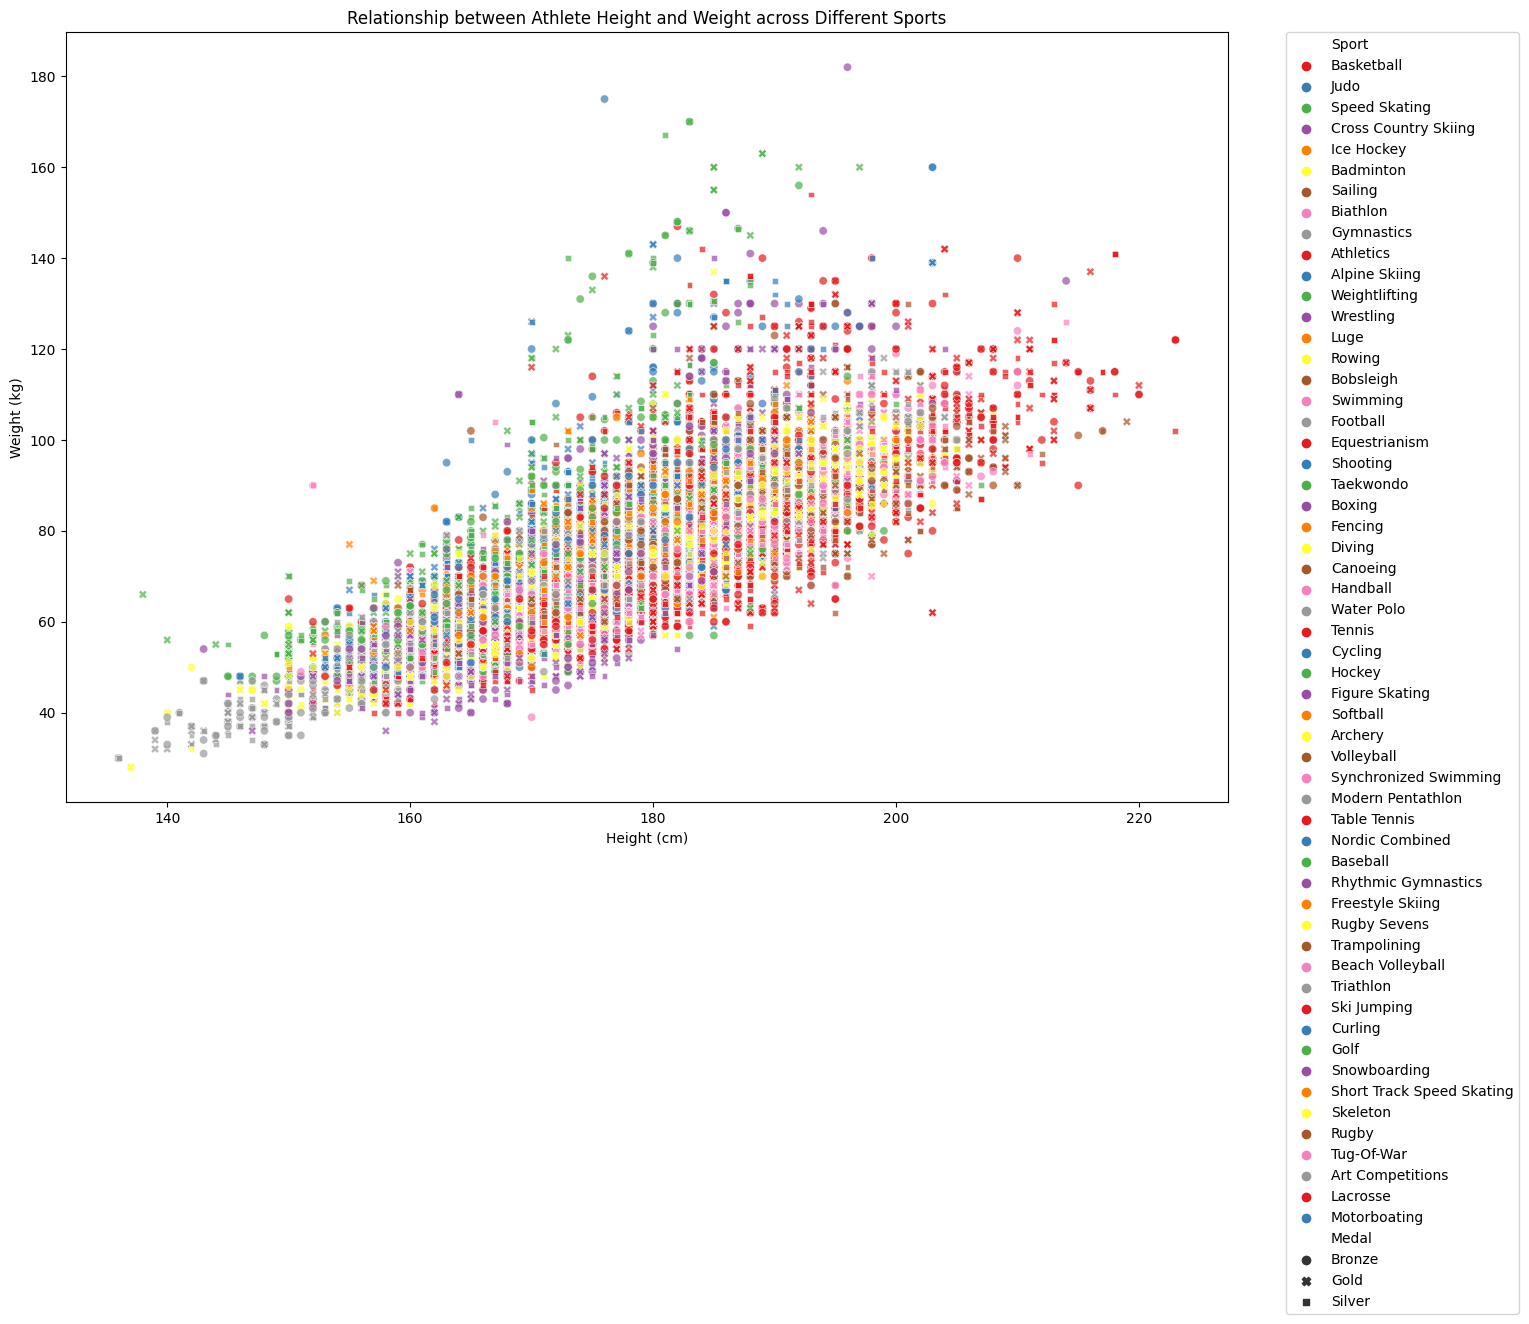

In [ ]:
# Dropping rows with missing values in 'Height' or 'Weight' for visualization purposes
df_plot = df.dropna(subset=['Height', 'Weight'])

# Create a scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_plot, x='Height', y='Weight', hue='Sport', style='Medal', alpha=0.7, palette='Set1')
plt.title('Relationship between Athlete Height and Weight across Different Sports')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

